In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
from utils.utils import *

Using TensorFlow backend.
/home/sjnam/anaconda3/envs/infmtv_keras_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sjnam/anaconda3/envs/infmtv_keras_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sjnam/anaconda3/envs/infmtv_keras_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [3]:
%config InlineBackend.figure_format = 'retina'

# Sem Den score 

In [4]:
# base_result_dum = np.load("base_result_0_dummy_bws.npy", allow_pickle=True)
# base_result_len = np.load("base_result_1_sentlen_bws.npy", allow_pickle=True)
# base_result_bow = np.load("base_result_2_bow_bws.npy", allow_pickle=True)
base_result_dum = np.load("base_result_0_dummy_glv.npy", allow_pickle=True)
base_result_len = np.load("base_result_1_sentlen_glv.npy", allow_pickle=True)
base_result_bow = np.load("base_result_2_bow_glv.npy", allow_pickle=True)

In [5]:
# elmo_result_nt_na_out = np.load("elmo_result_nt_na_out.npy", allow_pickle=True)
# elmo_result_nt_wa_out = np.load("elmo_result_nt_wa_out.npy", allow_pickle=True)
# elmo_result_ft_na_out = np.load("elmo_result_ft_na_out.npy", allow_pickle=True)
# elmo_result_ft_wa_out = np.load("elmo_result_ft_wa_out.npy", allow_pickle=True)
elmo_result_nt_na_out = np.load("elmo_result_nt_na_out_glv.npy", allow_pickle=True)
elmo_result_nt_wa_out = np.load("elmo_result_nt_wa_out_glv.npy", allow_pickle=True)
elmo_result_ft_na_out = np.load("elmo_result_ft_na_out_glv.npy", allow_pickle=True)
elmo_result_ft_wa_out = np.load("elmo_result_ft_wa_out_glv.npy", allow_pickle=True)

In [6]:
# bert_result_nt_na_out = np.load("bert_result_nt_na_out2.npy", allow_pickle=True)
# bert_result_nt_wa_out = np.load("bert_result_nt_wa_out2.npy", allow_pickle=True)
# bert_result_ft_na_out = np.load("bert_result_ft_na_out2.npy", allow_pickle=True)
# bert_result_ft_wa_out = np.load("bert_result_ft_wa_out2.npy", allow_pickle=True)
bert_result_nt_na_out = np.load("bert_result_nt_na_out_glv.npy", allow_pickle=True)
bert_result_nt_wa_out = np.load("bert_result_nt_wa_out_glv.npy", allow_pickle=True)
bert_result_ft_na_out = np.load("bert_result_ft_na_out_glv.npy", allow_pickle=True)
bert_result_ft_wa_out = np.load("bert_result_ft_wa_out_glv.npy", allow_pickle=True)

In [7]:
base_dum_rmse = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(base_result_dum[1], base_result_dum[0])]
base_len_rmse = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(base_result_len[1], base_result_len[0])]
base_bow_rmse = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(base_result_bow[1], base_result_bow[0])]

In [8]:
elmo_scr_rmse_nt_na = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(elmo_result_nt_na_out[0], elmo_result_nt_na_out[1])]
elmo_scr_rmse_nt_wa = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(elmo_result_nt_wa_out[0], elmo_result_nt_wa_out[1])]
elmo_scr_rmse_ft_na = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(elmo_result_ft_na_out[0], elmo_result_ft_na_out[1])]
elmo_scr_rmse_ft_wa = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(elmo_result_ft_wa_out[0], elmo_result_ft_wa_out[1])]

In [9]:
bert_scr_rmse_nt_na = [rmse(scr_true.flatten(), scr_pred) for scr_pred, scr_true in zip(bert_result_nt_na_out[0], bert_result_nt_na_out[1])]
bert_scr_rmse_nt_wa = [rmse(scr_true.flatten(), scr_pred) for scr_pred, scr_true in zip(bert_result_nt_wa_out[0], bert_result_nt_wa_out[1])]
bert_scr_rmse_ft_na = [rmse(scr_true.flatten(), scr_pred) for scr_pred, scr_true in zip(bert_result_ft_na_out[0], bert_result_ft_na_out[1])]
bert_scr_rmse_ft_wa = [rmse(scr_true.flatten(), scr_pred) for scr_pred, scr_true in zip(bert_result_ft_wa_out[0], bert_result_ft_wa_out[1])]

In [10]:
ci(base_dum_rmse), ci(base_len_rmse), ci(base_bow_rmse)

((0.16320116987064676, 0.1505312229749133, 0.1758711167663802),
 (0.1621838405115647, 0.14943015166909548, 0.17493752935403392),
 (0.1984807707775315, 0.18286333359447882, 0.2140982079605842))

In [11]:
ci(elmo_scr_rmse_nt_na), ci(elmo_scr_rmse_nt_wa), ci(elmo_scr_rmse_ft_na), ci(elmo_scr_rmse_ft_wa), 

((0.1637503990113533, 0.15259125795499082, 0.17490954006771578),
 (0.16118449807800678, 0.1482284693195979, 0.17414052683641565),
 (0.1660482889485883, 0.15445338443411813, 0.17764319346305849),
 (0.1615716828571594, 0.14898887556917925, 0.17415449014513953))

In [12]:
ci(bert_scr_rmse_nt_na), ci(bert_scr_rmse_nt_wa), ci(bert_scr_rmse_ft_na), ci(bert_scr_rmse_ft_wa), 

((0.24167551454777692, 0.2272581744612751, 0.2560928546342787),
 (0.16997956024317823, 0.15565145692712218, 0.18430766355923428),
 (0.20275734350424807, 0.19499580765003147, 0.21051887935846467),
 (0.16354989849692883, 0.15132824784760845, 0.1757715491462492))

In [13]:
ttest_ind(elmo_scr_rmse_nt_na, elmo_scr_rmse_nt_wa), ttest_ind(elmo_scr_rmse_ft_na, elmo_scr_rmse_ft_wa)

(Ttest_indResult(statistic=0.3394572062514431, pvalue=0.738193866341233),
 Ttest_indResult(statistic=0.591846688635358, pvalue=0.5613140805563115))

In [14]:
ttest_ind(bert_scr_rmse_nt_na, bert_scr_rmse_nt_wa), ttest_ind(bert_scr_rmse_ft_na, bert_scr_rmse_ft_wa)

(Ttest_indResult(statistic=7.979236122672525, pvalue=2.5430766467532074e-07),
 Ttest_indResult(statistic=6.126114745457839, pvalue=8.713620593777205e-06))

In [15]:
scr_rmse = pd.DataFrame({"Baseline\n - dummy": base_dum_rmse,
                         "Baseline\n - SentLen": base_len_rmse,
                         "Baseline\n - BoW": base_bow_rmse,
                         "ELMo - no tune\n no attn":elmo_scr_rmse_nt_na,
                         "ELMo - no tune\n /w attn":elmo_scr_rmse_nt_wa,
                         "ELMo - F. tune\n no attn":elmo_scr_rmse_ft_na, 
                         "ELMo - F. tune\n /w attn":elmo_scr_rmse_ft_wa,
                         "BERT - no tune\n no attn":bert_scr_rmse_nt_na,
                         "BERT - no tune\n /w attn":bert_scr_rmse_nt_wa,
                         "BERT - F. tune\n no attn":bert_scr_rmse_ft_na, 
                         "BERT - F. tune\n /w attn":bert_scr_rmse_ft_wa,})

In [16]:
scr_rmse

,Baseline - dummy,Baseline - SentLen,Baseline - BoW,ELMo - no tune no attn,ELMo - no tune /w attn,ELMo - F. tune no attn,ELMo - F. tune /w attn,BERT - no tune no attn,BERT - no tune /w attn,BERT - F. tune no attn,BERT - F. tune /w attn
0,0.173420,0.174188,0.200587,0.158433,0.155041,0.157438,0.161177,0.239279,0.186188,0.207946,0.171552
1,0.144232,0.141582,0.193153,0.157998,0.153104,0.159914,0.149701,0.250161,0.153646,0.194871,0.159089
2,0.149086,0.147831,0.179003,0.155689,0.150879,0.156171,0.157117,0.207207,0.163447,0.201076,0.147916
3,0.153049,0.152374,0.175405,0.153271,0.140626,0.145859,0.145146,0.242617,0.149078,0.192266,0.145429
4,0.149281,0.147262,0.177685,0.155018,0.151765,0.160966,0.152532,0.257190,0.154994,0.199266,0.152778
5,0.143301,0.142934,0.181688,0.138419,0.140396,0.147767,0.135169,0.214332,0.140855,0.199016,0.143089
6,0.188940,0.187989,0.232938,0.185682,0.187861,0.188573,0.189723,0.236315,0.195359,0.214716,0.189022
7,0.180402,0.177446,0.220495,0.171894,0.170876,0.186122,0.169502,0.264941,0.187668,0.221730,0.177413
8,0.164592,0.166078,0.194651,0.172670,0.169780,0.170174,0.168045,0.235000,0.175264,0.186315,0.161372
9,0.185709,0.184154,0.229203,0.188430,0.191515,0.187498,0.187605,0.269711,0.193297,0.210372,0.187837


In [17]:
ttest_ind(elmo_scr_rmse_ft_wa, bert_scr_rmse_ft_wa)

Ttest_indResult(statistic=-0.25511478729706705, pvalue=0.8015265883581076)

In [18]:
scr_rmse.filter(regex="F. tune").apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)

ELMo - F. tune\n no attn    [0.166, 0.154, 0.178]
ELMo - F. tune\n /w attn    [0.162, 0.149, 0.174]
BERT - F. tune\n no attn    [0.203, 0.195, 0.211]
BERT - F. tune\n /w attn    [0.164, 0.151, 0.176]
dtype: object

In [19]:
scr_rmse.filter(regex="Base").apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)

Baseline\n - dummy      [0.163, 0.151, 0.176]
Baseline\n - SentLen    [0.162, 0.149, 0.175]
Baseline\n - BoW        [0.198, 0.183, 0.214]
dtype: object

In [20]:
# from sklearn.metrics import roc_curve, auc

# def rocauc(y_true, y_pred, cut):
#     fpr, tpr, _ = roc_curve(y_true > np.quantile(y_true, q=[cut]), y_pred)
#     roc_auc = auc(fpr, tpr)
#     return (roc_auc)

In [21]:
base_dum_rocauc_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(base_result_dum[1], base_result_dum[0])]
base_dum_rocauc_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(base_result_dum[1], base_result_dum[0])]
base_dum_rocauc_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(base_result_dum[1], base_result_dum[0])]

base_len_rocauc_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(base_result_len[1], base_result_len[0])]
base_len_rocauc_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(base_result_len[1], base_result_len[0])]
base_len_rocauc_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(base_result_len[1], base_result_len[0])]

base_bow_rocauc_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(base_result_bow[1], base_result_bow[0])]
base_bow_rocauc_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(base_result_bow[1], base_result_bow[0])]
base_bow_rocauc_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(base_result_bow[1], base_result_bow[0])]

In [22]:
elmo_scr_rocauc_nt_na_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(elmo_result_nt_na_out[0], elmo_result_nt_na_out[1])]
elmo_scr_rocauc_nt_na_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(elmo_result_nt_na_out[0], elmo_result_nt_na_out[1])]
elmo_scr_rocauc_nt_na_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(elmo_result_nt_na_out[0], elmo_result_nt_na_out[1])]

elmo_scr_rocauc_nt_wa_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(elmo_result_nt_wa_out[0], elmo_result_nt_wa_out[1])]
elmo_scr_rocauc_nt_wa_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(elmo_result_nt_wa_out[0], elmo_result_nt_wa_out[1])]
elmo_scr_rocauc_nt_wa_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(elmo_result_nt_wa_out[0], elmo_result_nt_wa_out[1])]

elmo_scr_rocauc_ft_na_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(elmo_result_ft_na_out[0], elmo_result_ft_na_out[1])]
elmo_scr_rocauc_ft_na_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(elmo_result_ft_na_out[0], elmo_result_ft_na_out[1])]
elmo_scr_rocauc_ft_na_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(elmo_result_ft_na_out[0], elmo_result_ft_na_out[1])]

elmo_scr_rocauc_ft_wa_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(elmo_result_ft_wa_out[0], elmo_result_ft_wa_out[1])]
elmo_scr_rocauc_ft_wa_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(elmo_result_ft_wa_out[0], elmo_result_ft_wa_out[1])]
elmo_scr_rocauc_ft_wa_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(elmo_result_ft_wa_out[0], elmo_result_ft_wa_out[1])]


In [23]:
bert_scr_rocauc_nt_na_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(bert_result_nt_na_out[0], bert_result_nt_na_out[1])]
bert_scr_rocauc_nt_na_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(bert_result_nt_na_out[0], bert_result_nt_na_out[1])]
bert_scr_rocauc_nt_na_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(bert_result_nt_na_out[0], bert_result_nt_na_out[1])]

bert_scr_rocauc_nt_wa_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(bert_result_nt_wa_out[0], bert_result_nt_wa_out[1])]
bert_scr_rocauc_nt_wa_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(bert_result_nt_wa_out[0], bert_result_nt_wa_out[1])]
bert_scr_rocauc_nt_wa_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(bert_result_nt_wa_out[0], bert_result_nt_wa_out[1])]

bert_scr_rocauc_ft_na_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(bert_result_ft_na_out[0], bert_result_ft_na_out[1])]
bert_scr_rocauc_ft_na_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(bert_result_ft_na_out[0], bert_result_ft_na_out[1])]
bert_scr_rocauc_ft_na_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(bert_result_ft_na_out[0], bert_result_ft_na_out[1])]

bert_scr_rocauc_ft_wa_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(bert_result_ft_wa_out[0], bert_result_ft_wa_out[1])]
bert_scr_rocauc_ft_wa_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(bert_result_ft_wa_out[0], bert_result_ft_wa_out[1])]
bert_scr_rocauc_ft_wa_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(bert_result_ft_wa_out[0], bert_result_ft_wa_out[1])]

In [24]:
ci(base_dum_rocauc_m5), ci(base_len_rocauc_m5), ci(base_bow_rocauc_m5)

((0.5, 0.5, 0.5),
 (0.5733403806520281, 0.5516353383121531, 0.5950454229919031),
 (0.5586252782959931, 0.5201894103348322, 0.5970611462571539))

In [25]:
ci(elmo_scr_rocauc_nt_na_m5), ci(elmo_scr_rocauc_nt_wa_m5), ci(elmo_scr_rocauc_ft_na_m5), ci(elmo_scr_rocauc_ft_wa_m5), 

((0.622435921982867, 0.5912181563698115, 0.6536536875959226),
 (0.618097701661432, 0.5779808033757569, 0.6582145999471071),
 (0.6160627724500293, 0.56464032788944, 0.6674852170106186),
 (0.6244008755030567, 0.5852174656880342, 0.6635842853180791))

In [26]:
ci(bert_scr_rocauc_nt_na_m5), ci(bert_scr_rocauc_nt_wa_m5), ci(bert_scr_rocauc_ft_na_m5), ci(bert_scr_rocauc_ft_wa_m5), 

((0.5484346606431447, 0.503433142073179, 0.5934361792131104),
 (0.48879612208437156, 0.4558989758974998, 0.5216932682712434),
 (0.5810599937716084, 0.5631389744697387, 0.5989810130734782),
 (0.6073200923269569, 0.5713895801766151, 0.6432506044772988))

In [27]:
ttest_ind(elmo_scr_rocauc_nt_na_m5, elmo_scr_rocauc_nt_wa_m5), ttest_ind(elmo_scr_rocauc_ft_na_m5, elmo_scr_rocauc_ft_wa_m5)

(Ttest_indResult(statistic=0.19306133984860954, pvalue=0.8490726155148264),
 Ttest_indResult(statistic=-0.29175767357035653, pvalue=0.7738077114379156))

In [28]:
ttest_ind(bert_scr_rocauc_nt_na_m5, bert_scr_rocauc_nt_wa_m5), ttest_ind(bert_scr_rocauc_ft_na_m5, bert_scr_rocauc_ft_wa_m5)

(Ttest_indResult(statistic=2.4202156115241915, pvalue=0.02631068262717661),
 Ttest_indResult(statistic=-1.4794981641683824, pvalue=0.15629626049958648))

In [29]:
scr_rocauc = pd.DataFrame({"Baseline\n - dummy_l2":base_dum_rocauc_l2,
                           "Baseline\n - dummy_m5":base_dum_rocauc_m5,
                           "Baseline\n - dummy_h8":base_dum_rocauc_h8,
                           "Baseline\n - SentLen_l2":base_len_rocauc_l2,
                           "Baseline\n - SentLen_m5":base_len_rocauc_m5,
                           "Baseline\n - SentLen_h8":base_len_rocauc_h8,
                           "Baseline\n - BoW_l2":base_bow_rocauc_l2,
                           "Baseline\n - BoW_m5":base_bow_rocauc_m5,
                           "Baseline\n - BoW_h8":base_bow_rocauc_h8,
                           "ELMo - no tune\n no attn_l2":elmo_scr_rocauc_nt_na_l2,
                           "ELMo - no tune\n no attn_m5":elmo_scr_rocauc_nt_na_m5,
                           "ELMo - no tune\n no attn_h8":elmo_scr_rocauc_nt_na_h8,
                           "ELMo - no tune\n /w attn_l2":elmo_scr_rocauc_nt_wa_l2,
                           "ELMo - no tune\n /w attn_m5":elmo_scr_rocauc_nt_wa_m5,
                           "ELMo - no tune\n /w attn_h8":elmo_scr_rocauc_nt_wa_h8,
                           "ELMo - F. tune\n no attn_l2":elmo_scr_rocauc_ft_na_l2, 
                           "ELMo - F. tune\n no attn_m5":elmo_scr_rocauc_ft_na_m5, 
                           "ELMo - F. tune\n no attn_h8":elmo_scr_rocauc_ft_na_h8, 
                           "ELMo - F. tune\n /w attn_l2":elmo_scr_rocauc_ft_wa_l2,
                           "ELMo - F. tune\n /w attn_m5":elmo_scr_rocauc_ft_wa_m5,
                           "ELMo - F. tune\n /w attn_h8":elmo_scr_rocauc_ft_wa_h8,
                           "BERT - no tune\n no attn_l2":bert_scr_rocauc_nt_na_l2,
                           "BERT - no tune\n no attn_m5":bert_scr_rocauc_nt_na_m5,
                           "BERT - no tune\n no attn_h8":bert_scr_rocauc_nt_na_h8,
                           "BERT - no tune\n /w attn_l2":bert_scr_rocauc_nt_wa_l2,
                           "BERT - no tune\n /w attn_m5":bert_scr_rocauc_nt_wa_m5,
                           "BERT - no tune\n /w attn_h8":bert_scr_rocauc_nt_wa_h8,
                           "BERT - F. tune\n no attn_l2":bert_scr_rocauc_ft_na_l2, 
                           "BERT - F. tune\n no attn_m5":bert_scr_rocauc_ft_na_m5, 
                           "BERT - F. tune\n no attn_h8":bert_scr_rocauc_ft_na_h8, 
                           "BERT - F. tune\n /w attn_l2":bert_scr_rocauc_ft_wa_l2,
                           "BERT - F. tune\n /w attn_m5":bert_scr_rocauc_ft_wa_m5,
                           "BERT - F. tune\n /w attn_h8":bert_scr_rocauc_ft_wa_h8})

In [30]:
scr_rocauc

,Baseline - dummy_l2,Baseline - dummy_m5,Baseline - dummy_h8,Baseline - SentLen_l2,Baseline - SentLen_m5,Baseline - SentLen_h8,Baseline - BoW_l2,Baseline - BoW_m5,Baseline - BoW_h8,ELMo - no tune no attn_l2,...,BERT - no tune no attn_h8,BERT - no tune /w attn_l2,BERT - no tune /w attn_m5,BERT - no tune /w attn_h8,BERT - F. tune no attn_l2,BERT - F. tune no attn_m5,BERT - F. tune no attn_h8,BERT - F. tune /w attn_l2,BERT - F. tune /w attn_m5,BERT - F. tune /w attn_h8
0,0.5,0.5,0.5,0.531636,0.544753,0.496624,0.580633,0.580988,0.597415,0.664159,...,0.640818,0.549769,0.494568,0.417052,0.669753,0.563580,0.577546,0.679784,0.670741,0.615741
1,0.5,0.5,0.5,0.545649,0.584707,0.616356,0.494561,0.511860,0.516123,0.543318,...,0.617133,0.495726,0.480025,0.500000,0.563520,0.593508,0.497475,0.621406,0.546067,0.538850
2,0.5,0.5,0.5,0.607971,0.581262,0.520393,0.513251,0.551724,0.551760,0.658799,...,0.539959,0.363354,0.389334,0.411801,0.469358,0.563218,0.657971,0.588820,0.597968,0.631056
3,0.5,0.5,0.5,0.490623,0.572779,0.559294,0.566464,0.655009,0.601213,0.626586,...,0.454495,0.550653,0.545369,0.560581,0.635411,0.572543,0.500827,0.639456,0.598653,0.605810
4,0.5,0.5,0.5,0.603002,0.600775,0.578157,0.549068,0.609062,0.627950,0.601242,...,0.469565,0.509938,0.506549,0.538095,0.522153,0.564555,0.581366,0.622153,0.575782,0.579710
5,0.5,0.5,0.5,0.557557,0.575849,0.539752,0.571636,0.576717,0.597101,0.615321,...,0.557143,0.534369,0.531141,0.521118,0.667909,0.592088,0.601656,0.568116,0.559209,0.611180
6,0.5,0.5,0.5,0.532635,0.524929,0.581817,0.509377,0.464969,0.445211,0.517375,...,0.637066,0.530796,0.495510,0.462953,0.569958,0.543124,0.591653,0.583379,0.557656,0.627505
7,0.5,0.5,0.5,0.669608,0.621456,0.638812,0.537783,0.516304,0.543298,0.708402,...,0.513697,0.510204,0.511224,0.557639,0.594411,0.627009,0.617577,0.705093,0.689863,0.666851
8,0.5,0.5,0.5,0.575383,0.534615,0.444157,0.578544,0.575946,0.551916,0.583716,...,0.472797,0.551341,0.433700,0.452299,0.584674,0.610256,0.619157,0.623180,0.649084,0.702299
9,0.5,0.5,0.5,0.601251,0.592280,0.585506,0.661940,0.543672,0.465693,0.777894,...,0.471324,0.546820,0.500541,0.525756,0.625443,0.580719,0.554536,0.682169,0.628177,0.652972


In [31]:
ci(elmo_scr_rocauc_ft_wa_l2), ci(bert_scr_rocauc_ft_wa_l2)

((0.6229731397040533, 0.5637509969104995, 0.6821952824976072),
 (0.6313556279459596, 0.5986686336880409, 0.6640426222038782))

In [32]:
ttest_ind(elmo_scr_rocauc_ft_wa_l2, bert_scr_rocauc_ft_wa_l2)

Ttest_indResult(statistic=-0.28032825311187354, pvalue=0.7824220426938997)

In [33]:
scr_rocauc[['ELMo - F. tune\n no attn_l2', 'ELMo - F. tune\n /w attn_l2', 
            'BERT - F. tune\n no attn_l2', 'BERT - F. tune\n /w attn_l2', ]]\
.apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)

ELMo - F. tune\n no attn_l2    [0.608, 0.557, 0.659]
ELMo - F. tune\n /w attn_l2    [0.623, 0.564, 0.682]
BERT - F. tune\n no attn_l2     [0.59, 0.545, 0.636]
BERT - F. tune\n /w attn_l2    [0.631, 0.599, 0.664]
dtype: object

In [34]:
ci(elmo_scr_rocauc_ft_wa_m5), ci(bert_scr_rocauc_ft_wa_m5)

((0.6244008755030567, 0.5852174656880342, 0.6635842853180791),
 (0.6073200923269569, 0.5713895801766151, 0.6432506044772988))

In [35]:
ttest_ind(elmo_scr_rocauc_ft_wa_m5, bert_scr_rocauc_ft_wa_m5)

Ttest_indResult(statistic=0.7268055766737767, pvalue=0.4766917638828333)

In [36]:
scr_rocauc[['ELMo - F. tune\n no attn_m5', 'ELMo - F. tune\n /w attn_m5', 
            'BERT - F. tune\n no attn_m5', 'BERT - F. tune\n /w attn_m5', ]]\
.apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)

ELMo - F. tune\n no attn_m5    [0.616, 0.565, 0.667]
ELMo - F. tune\n /w attn_m5    [0.624, 0.585, 0.664]
BERT - F. tune\n no attn_m5    [0.581, 0.563, 0.599]
BERT - F. tune\n /w attn_m5    [0.607, 0.571, 0.643]
dtype: object

In [37]:
ci(elmo_scr_rocauc_ft_wa_h8), ci(bert_scr_rocauc_ft_wa_h8)

((0.6357676480117362, 0.5998575781415596, 0.6716777178819129),
 (0.6231973117204368, 0.5906440526247518, 0.6557505708161218))

In [38]:
ttest_ind(elmo_scr_rocauc_ft_wa_h8, bert_scr_rocauc_ft_wa_h8)

Ttest_indResult(statistic=0.586685367355988, pvalue=0.5647012730256112)

In [39]:
scr_rocauc[['ELMo - F. tune\n no attn_h8', 'ELMo - F. tune\n /w attn_h8', 
            'BERT - F. tune\n no attn_h8', 'BERT - F. tune\n /w attn_h8', ]]\
.apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)

ELMo - F. tune\n no attn_h8    [0.628, 0.589, 0.667]
ELMo - F. tune\n /w attn_h8      [0.636, 0.6, 0.672]
BERT - F. tune\n no attn_h8     [0.58, 0.544, 0.616]
BERT - F. tune\n /w attn_h8    [0.623, 0.591, 0.656]
dtype: object

In [40]:
tt_rmse = scr_rmse[['Baseline\n - dummy', 'Baseline\n - BoW', 'Baseline\n - SentLen', 
                                     'ELMo - F. tune\n no attn', 'ELMo - F. tune\n /w attn', 
                                     'BERT - F. tune\n no attn', 'BERT - F. tune\n /w attn', ]]
tt_rmse.columns = [x+"_1-rmse" for x in list(tt_rmse.columns)]
tt_rmse = pd.melt(tt_rmse)
tt_rmse['value'] = 1-tt_rmse['value']

In [41]:
tt_l2 = pd.melt(scr_rocauc[['Baseline\n - dummy_l2', 'Baseline\n - BoW_l2', 'Baseline\n - SentLen_l2',
                                     'ELMo - F. tune\n no attn_l2', 'ELMo - F. tune\n /w attn_l2', 
                                     'BERT - F. tune\n no attn_l2', 'BERT - F. tune\n /w attn_l2', ]])
tt_h8 = pd.melt(scr_rocauc[['Baseline\n - dummy_h8', 'Baseline\n - BoW_h8', 'Baseline\n - SentLen_h8',
                                     'ELMo - F. tune\n no attn_h8', 'ELMo - F. tune\n /w attn_h8', 
                                     'BERT - F. tune\n no attn_h8', 'BERT - F. tune\n /w attn_h8', ]])
tt_m5 = pd.melt(scr_rocauc[['Baseline\n - dummy_m5', 'Baseline\n - BoW_m5', 'Baseline\n - SentLen_m5',
                                     'ELMo - F. tune\n no attn_m5', 'ELMo - F. tune\n /w attn_m5', 
                                     'BERT - F. tune\n no attn_m5', 'BERT - F. tune\n /w attn_m5', ]])

tt_glv = pd.concat([tt_rmse, tt_l2, tt_h8, tt_m5], axis=0)
# tt = tt_l2

In [42]:
tt_glv['category'] = tt_glv['variable'].apply(lambda x:x.split('\n')[0])
tt_glv['models'] = tt_glv['variable'].apply(lambda x:x.split('\n')[0] + x.split('\n')[-1].split('_')[0])
tt_glv['score_type'] = tt_glv['variable'].apply(lambda x:x.split('\n')[-1].split('_')[1])

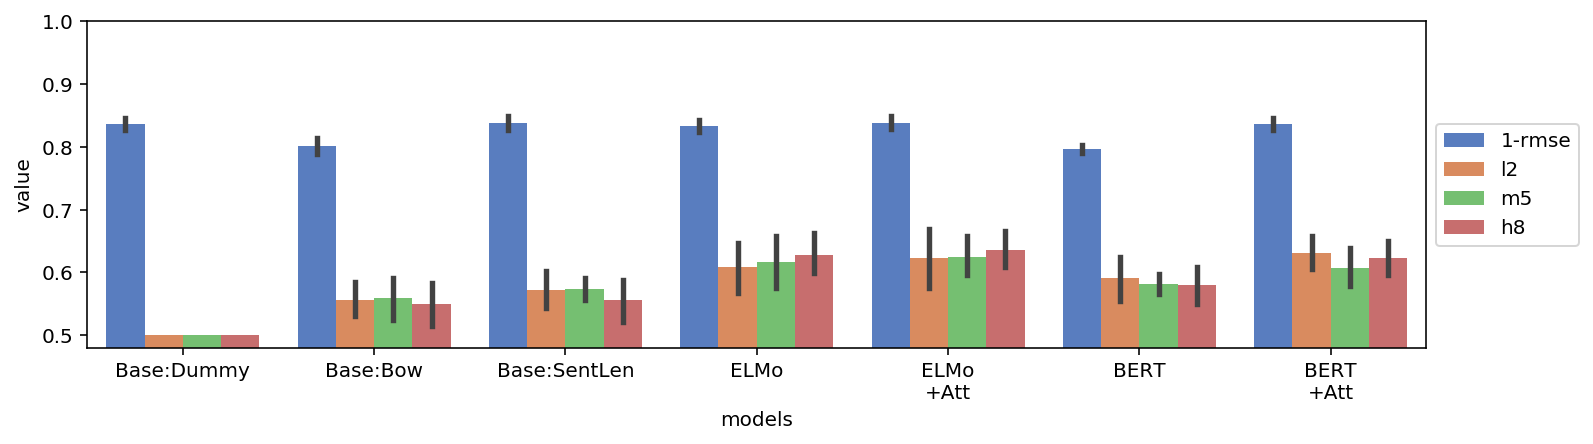

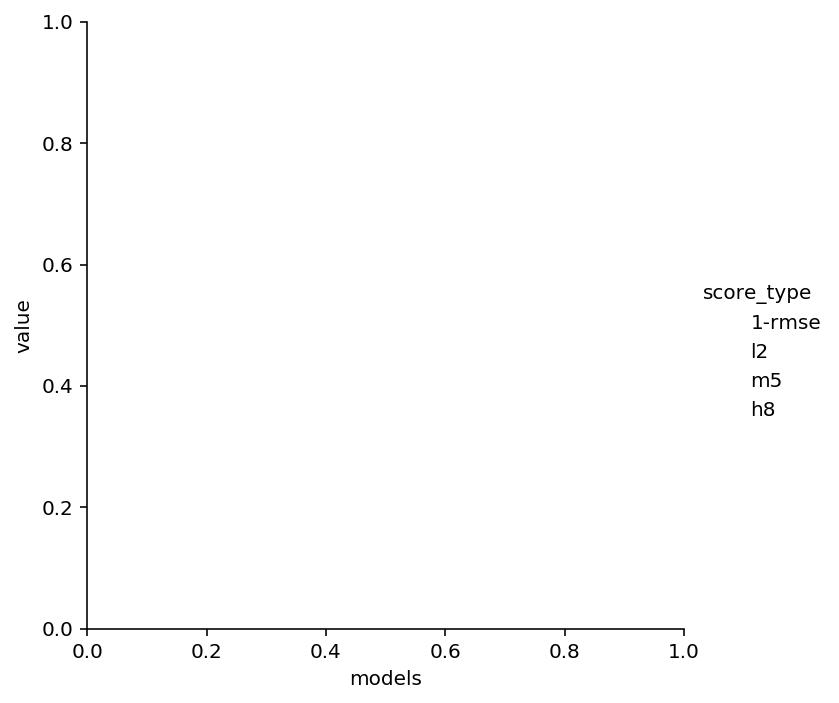

In [43]:
# TODO: baseline split by model type; ELMo&BERT by +ATT

fig, ax = plt.subplots(figsize=(12,3))
sns.catplot(x='models', y='value', hue='score_type',  hue_order=['1-rmse','l2', 'm5', 'h8'],
                  kind="bar", palette="muted",
                  data=tt_glv, ax=ax)
# ax.set_xticklabels(['dummy', 'SentLen', 'BoW',
#            'ELMo', 'ELMo\n+Att',
#            'BERT', 'BERT\n+Att'])
ax.set_ylim(0.48, 1)
ax.set_xticklabels(['Base:Dummy', 'Base:Bow', 'Base:SentLen',
           'ELMo', 'ELMo\n+Att',
           'BERT', 'BERT\n+Att'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

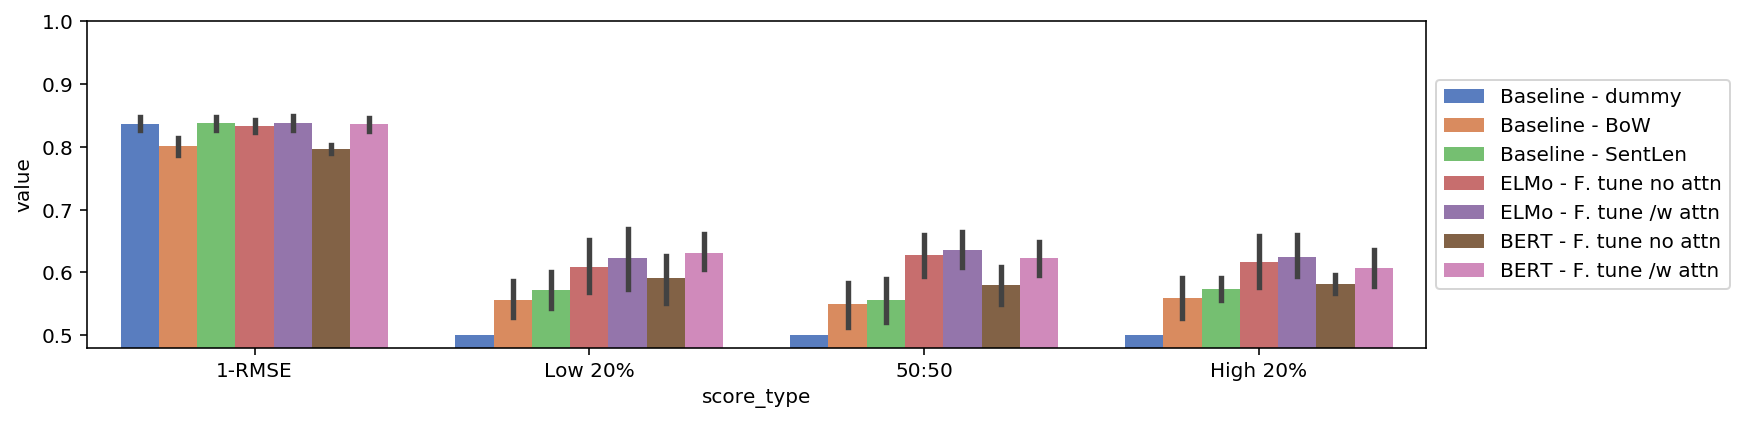

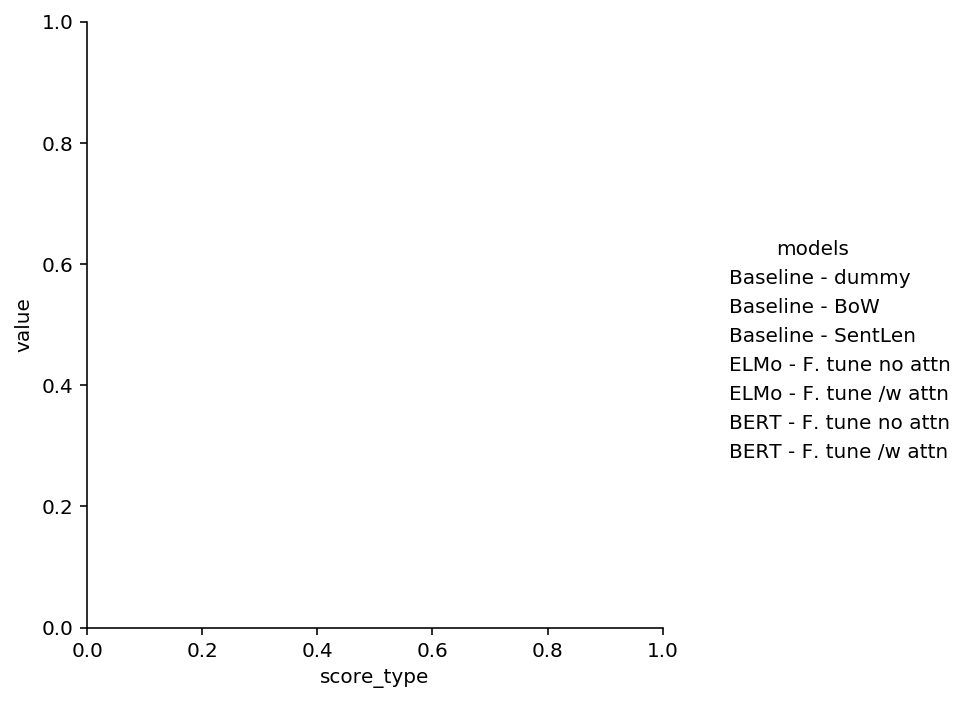

In [44]:
# TODO: baseline split by model type; ELMo&BERT by +ATT

fig, ax = plt.subplots(figsize=(12,3))
sns.catplot(x='score_type', y='value', hue='models',
            kind="bar", palette="muted",
            data=tt_glv, 
            ax=ax, legend_out=True)
# ax.set_xticklabels(['dummy', 'SentLen', 'BoW',
#            'ELMo', 'ELMo\n+Att',
#            'BERT', 'BERT\n+Att'])
ax.set_ylim(0.48, 1)
ax.set_xticklabels(['1-RMSE', 'Low 20%', '50:50', 'High 20%'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [45]:
pd.concat(
    [scr_rmse.filter(regex="Base").apply(lambda col:[round(x, 3)for x in ci(col)], axis=0),
     scr_rmse.filter(regex="F. tune").apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)], axis=0)

Baseline\n - dummy          [0.163, 0.151, 0.176]
Baseline\n - SentLen        [0.162, 0.149, 0.175]
Baseline\n - BoW            [0.198, 0.183, 0.214]
ELMo - F. tune\n no attn    [0.166, 0.154, 0.178]
ELMo - F. tune\n /w attn    [0.162, 0.149, 0.174]
BERT - F. tune\n no attn    [0.203, 0.195, 0.211]
BERT - F. tune\n /w attn    [0.164, 0.151, 0.176]
dtype: object

In [46]:
pd.concat([
    scr_rocauc[['Baseline\n - dummy_l2', 'Baseline\n - BoW_l2', 'Baseline\n - SentLen_l2']]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0),
    scr_rocauc[['ELMo - F. tune\n no attn_l2', 'ELMo - F. tune\n /w attn_l2', 
                'BERT - F. tune\n no attn_l2', 'BERT - F. tune\n /w attn_l2', ]]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)])

Baseline\n - dummy_l2                [0.5, 0.5, 0.5]
Baseline\n - BoW_l2            [0.556, 0.522, 0.591]
Baseline\n - SentLen_l2        [0.572, 0.535, 0.608]
ELMo - F. tune\n no attn_l2    [0.608, 0.557, 0.659]
ELMo - F. tune\n /w attn_l2    [0.623, 0.564, 0.682]
BERT - F. tune\n no attn_l2     [0.59, 0.545, 0.636]
BERT - F. tune\n /w attn_l2    [0.631, 0.599, 0.664]
dtype: object

In [47]:
pd.concat([
    scr_rocauc[['Baseline\n - dummy_m5', 'Baseline\n - BoW_m5', 'Baseline\n - SentLen_m5',]]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0),
    scr_rocauc[['ELMo - F. tune\n no attn_m5', 'ELMo - F. tune\n /w attn_m5', 
                'BERT - F. tune\n no attn_m5', 'BERT - F. tune\n /w attn_m5', ]]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)])

Baseline\n - dummy_m5                [0.5, 0.5, 0.5]
Baseline\n - BoW_m5             [0.559, 0.52, 0.597]
Baseline\n - SentLen_m5        [0.573, 0.552, 0.595]
ELMo - F. tune\n no attn_m5    [0.616, 0.565, 0.667]
ELMo - F. tune\n /w attn_m5    [0.624, 0.585, 0.664]
BERT - F. tune\n no attn_m5    [0.581, 0.563, 0.599]
BERT - F. tune\n /w attn_m5    [0.607, 0.571, 0.643]
dtype: object

In [48]:
pd.concat([
    scr_rocauc[['Baseline\n - dummy_h8', 'Baseline\n - BoW_h8', 'Baseline\n - SentLen_h8',]]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0),
    scr_rocauc[['ELMo - F. tune\n no attn_h8', 'ELMo - F. tune\n /w attn_h8', 
                'BERT - F. tune\n no attn_h8', 'BERT - F. tune\n /w attn_h8', ]]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)])

Baseline\n - dummy_h8                [0.5, 0.5, 0.5]
Baseline\n - BoW_h8             [0.55, 0.507, 0.593]
Baseline\n - SentLen_h8        [0.556, 0.515, 0.597]
ELMo - F. tune\n no attn_h8    [0.628, 0.589, 0.667]
ELMo - F. tune\n /w attn_h8      [0.636, 0.6, 0.672]
BERT - F. tune\n no attn_h8     [0.58, 0.544, 0.616]
BERT - F. tune\n /w attn_h8    [0.623, 0.591, 0.656]
dtype: object

# BWS Score 

In [49]:
base_result_dum = np.load("base_result_0_dummy_bws.npy", allow_pickle=True)
base_result_len = np.load("base_result_1_sentlen_bws.npy", allow_pickle=True)
base_result_bow = np.load("base_result_2_bow_bws.npy", allow_pickle=True)
# base_result_dum = np.load("base_result_0_dummy_glv.npy", allow_pickle=True)
# base_result_len = np.load("base_result_1_sentlen_glv.npy", allow_pickle=True)
# base_result_bow = np.load("base_result_2_bow_glv.npy", allow_pickle=True)

In [50]:
elmo_result_nt_na_out = np.load("elmo_result_nt_na_out.npy", allow_pickle=True)
elmo_result_nt_wa_out = np.load("elmo_result_nt_wa_out.npy", allow_pickle=True)
elmo_result_ft_na_out = np.load("elmo_result_ft_na_out.npy", allow_pickle=True)
elmo_result_ft_wa_out = np.load("elmo_result_ft_wa_out.npy", allow_pickle=True)
# elmo_result_nt_na_out = np.load("elmo_result_nt_na_out_glv.npy", allow_pickle=True)
# elmo_result_nt_wa_out = np.load("elmo_result_nt_wa_out_glv.npy", allow_pickle=True)
# elmo_result_ft_na_out = np.load("elmo_result_ft_na_out_glv.npy", allow_pickle=True)
# elmo_result_ft_wa_out = np.load("elmo_result_ft_wa_out_glv.npy", allow_pickle=True)

In [51]:
bert_result_nt_na_out = np.load("bert_result_nt_na_out2.npy", allow_pickle=True)
bert_result_nt_wa_out = np.load("bert_result_nt_wa_out2.npy", allow_pickle=True)
bert_result_ft_na_out = np.load("bert_result_ft_na_out2.npy", allow_pickle=True)
bert_result_ft_wa_out = np.load("bert_result_ft_wa_out2.npy", allow_pickle=True)
# bert_result_nt_na_out = np.load("bert_result_nt_na_out_glv.npy", allow_pickle=True)
# bert_result_nt_wa_out = np.load("bert_result_nt_wa_out_glv.npy", allow_pickle=True)
# bert_result_ft_na_out = np.load("bert_result_ft_na_out_glv.npy", allow_pickle=True)
# bert_result_ft_wa_out = np.load("bert_result_ft_wa_out_glv.npy", allow_pickle=True)

In [52]:
base_dum_rmse = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(base_result_dum[1], base_result_dum[0])]
base_len_rmse = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(base_result_len[1], base_result_len[0])]
base_bow_rmse = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(base_result_bow[1], base_result_bow[0])]

In [53]:
elmo_scr_rmse_nt_na = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(elmo_result_nt_na_out[0], elmo_result_nt_na_out[1])]
elmo_scr_rmse_nt_wa = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(elmo_result_nt_wa_out[0], elmo_result_nt_wa_out[1])]
elmo_scr_rmse_ft_na = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(elmo_result_ft_na_out[0], elmo_result_ft_na_out[1])]
elmo_scr_rmse_ft_wa = [rmse(scr_true, scr_pred) for scr_pred, scr_true in zip(elmo_result_ft_wa_out[0], elmo_result_ft_wa_out[1])]

In [54]:
bert_scr_rmse_nt_na = [rmse(scr_true.flatten(), scr_pred) for scr_pred, scr_true in zip(bert_result_nt_na_out[0], bert_result_nt_na_out[1])]
bert_scr_rmse_nt_wa = [rmse(scr_true.flatten(), scr_pred) for scr_pred, scr_true in zip(bert_result_nt_wa_out[0], bert_result_nt_wa_out[1])]
bert_scr_rmse_ft_na = [rmse(scr_true.flatten(), scr_pred) for scr_pred, scr_true in zip(bert_result_ft_na_out[0], bert_result_ft_na_out[1])]
bert_scr_rmse_ft_wa = [rmse(scr_true.flatten(), scr_pred) for scr_pred, scr_true in zip(bert_result_ft_wa_out[0], bert_result_ft_wa_out[1])]

In [55]:
ci(base_dum_rmse), ci(base_len_rmse), ci(base_bow_rmse)

((0.314815220692264, 0.3038092755552034, 0.3258211658293246),
 (0.3083125347076575, 0.2977663695459655, 0.3188586998693495),
 (0.3208801621122232, 0.3105143658801251, 0.3312459583443213))

In [56]:
ci(elmo_scr_rmse_nt_na), ci(elmo_scr_rmse_nt_wa), ci(elmo_scr_rmse_ft_na), ci(elmo_scr_rmse_ft_wa), 

((0.17245594240766687, 0.1619519461619691, 0.18295993865336466),
 (0.165534795371925, 0.15782742733434243, 0.17324216340950757),
 (0.17900368063077934, 0.1699832410219483, 0.18802412023961038),
 (0.16603854652418473, 0.15923274777866364, 0.17284434526970582))

In [57]:
ci(bert_scr_rmse_nt_na), ci(bert_scr_rmse_nt_wa), ci(bert_scr_rmse_ft_na), ci(bert_scr_rmse_ft_wa), 

((0.25801569348569914, 0.24440928069190768, 0.27162210627949057),
 (0.22178503840247035, 0.21107155275842393, 0.23249852404651677),
 (0.20142469076933125, 0.19247677373347225, 0.21037260780519026),
 (0.15388351531178046, 0.14584161069858326, 0.16192541992497766))

In [58]:
ttest_ind(elmo_scr_rmse_nt_na, elmo_scr_rmse_nt_wa), ttest_ind(elmo_scr_rmse_ft_na, elmo_scr_rmse_ft_wa)

(Ttest_indResult(statistic=1.2017441075040445, pvalue=0.24503584024115418),
 Ttest_indResult(statistic=2.595530037302397, pvalue=0.018270220353027666))

In [59]:
ttest_ind(bert_scr_rmse_nt_na, bert_scr_rmse_nt_wa), ttest_ind(bert_scr_rmse_ft_na, bert_scr_rmse_ft_wa)

(Ttest_indResult(statistic=4.732614594263438, pvalue=0.00016615069778146819),
 Ttest_indResult(statistic=8.939273657462575, pvalue=4.870779333720333e-08))

In [60]:
scr_rmse = pd.DataFrame({"Baseline\n - dummy": base_dum_rmse,
                         "Baseline\n - SentLen": base_len_rmse,
                         "Baseline\n - BoW": base_bow_rmse,
                         "ELMo - no tune\n no attn":elmo_scr_rmse_nt_na,
                         "ELMo - no tune\n /w attn":elmo_scr_rmse_nt_wa,
                         "ELMo - F. tune\n no attn":elmo_scr_rmse_ft_na, 
                         "ELMo - F. tune\n /w attn":elmo_scr_rmse_ft_wa,
                         "BERT - no tune\n no attn":bert_scr_rmse_nt_na,
                         "BERT - no tune\n /w attn":bert_scr_rmse_nt_wa,
                         "BERT - F. tune\n no attn":bert_scr_rmse_ft_na, 
                         "BERT - F. tune\n /w attn":bert_scr_rmse_ft_wa,})

In [61]:
scr_rmse

,Baseline - dummy,Baseline - SentLen,Baseline - BoW,ELMo - no tune no attn,ELMo - no tune /w attn,ELMo - F. tune no attn,ELMo - F. tune /w attn,BERT - no tune no attn,BERT - no tune /w attn,BERT - F. tune no attn,BERT - F. tune /w attn
0,0.317539,0.309594,0.302003,0.157661,0.163463,0.185310,0.161144,0.258110,0.228997,0.223225,0.176235
1,0.334781,0.331460,0.332347,0.188460,0.189523,0.197776,0.184674,0.274912,0.232740,0.197149,0.154325
2,0.327414,0.320033,0.336899,0.172838,0.165373,0.168697,0.169336,0.241834,0.240352,0.179903,0.138483
3,0.315395,0.311749,0.309400,0.172334,0.159734,0.176593,0.160958,0.246090,0.214301,0.203581,0.147737
4,0.326311,0.318180,0.316848,0.171481,0.179205,0.192550,0.176470,0.284265,0.231476,0.212112,0.152743
5,0.321151,0.309399,0.318874,0.172665,0.161728,0.171065,0.166004,0.282015,0.239522,0.207799,0.154698
6,0.288587,0.284265,0.329036,0.201400,0.164613,0.186601,0.168744,0.272252,0.217859,0.208225,0.167126
7,0.303720,0.299033,0.335061,0.150839,0.156003,0.158388,0.156786,0.248890,0.200636,0.193548,0.149473
8,0.321590,0.313092,0.331992,0.160472,0.154673,0.166902,0.151809,0.231604,0.199849,0.200815,0.141317
9,0.291664,0.286320,0.296341,0.176410,0.161033,0.186154,0.164461,0.240186,0.212119,0.187889,0.156700


In [62]:
ttest_ind(elmo_scr_rmse_ft_wa, bert_scr_rmse_ft_wa)

Ttest_indResult(statistic=2.6099652385890115, pvalue=0.017723929155590637)

In [63]:
scr_rmse.filter(regex="F. tune").apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)

ELMo - F. tune\n no attn     [0.179, 0.17, 0.188]
ELMo - F. tune\n /w attn    [0.166, 0.159, 0.173]
BERT - F. tune\n no attn     [0.201, 0.192, 0.21]
BERT - F. tune\n /w attn    [0.154, 0.146, 0.162]
dtype: object

In [64]:
# from sklearn.metrics import roc_curve, auc

# def rocauc(y_true, y_pred, cut):
#     fpr, tpr, _ = roc_curve(y_true > np.quantile(y_true, q=[cut]), y_pred)
#     roc_auc = auc(fpr, tpr)
#     return (roc_auc)

In [65]:
base_dum_rocauc_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(base_result_dum[1], base_result_dum[0])]
base_dum_rocauc_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(base_result_dum[1], base_result_dum[0])]
base_dum_rocauc_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(base_result_dum[1], base_result_dum[0])]

base_len_rocauc_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(base_result_len[1], base_result_len[0])]
base_len_rocauc_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(base_result_len[1], base_result_len[0])]
base_len_rocauc_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(base_result_len[1], base_result_len[0])]

base_bow_rocauc_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(base_result_bow[1], base_result_bow[0])]
base_bow_rocauc_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(base_result_bow[1], base_result_bow[0])]
base_bow_rocauc_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(base_result_bow[1], base_result_bow[0])]

In [66]:
elmo_scr_rocauc_nt_na_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(elmo_result_nt_na_out[0], elmo_result_nt_na_out[1])]
elmo_scr_rocauc_nt_na_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(elmo_result_nt_na_out[0], elmo_result_nt_na_out[1])]
elmo_scr_rocauc_nt_na_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(elmo_result_nt_na_out[0], elmo_result_nt_na_out[1])]

elmo_scr_rocauc_nt_wa_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(elmo_result_nt_wa_out[0], elmo_result_nt_wa_out[1])]
elmo_scr_rocauc_nt_wa_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(elmo_result_nt_wa_out[0], elmo_result_nt_wa_out[1])]
elmo_scr_rocauc_nt_wa_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(elmo_result_nt_wa_out[0], elmo_result_nt_wa_out[1])]

elmo_scr_rocauc_ft_na_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(elmo_result_ft_na_out[0], elmo_result_ft_na_out[1])]
elmo_scr_rocauc_ft_na_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(elmo_result_ft_na_out[0], elmo_result_ft_na_out[1])]
elmo_scr_rocauc_ft_na_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(elmo_result_ft_na_out[0], elmo_result_ft_na_out[1])]

elmo_scr_rocauc_ft_wa_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(elmo_result_ft_wa_out[0], elmo_result_ft_wa_out[1])]
elmo_scr_rocauc_ft_wa_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(elmo_result_ft_wa_out[0], elmo_result_ft_wa_out[1])]
elmo_scr_rocauc_ft_wa_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(elmo_result_ft_wa_out[0], elmo_result_ft_wa_out[1])]


In [67]:
bert_scr_rocauc_nt_na_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(bert_result_nt_na_out[0], bert_result_nt_na_out[1])]
bert_scr_rocauc_nt_na_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(bert_result_nt_na_out[0], bert_result_nt_na_out[1])]
bert_scr_rocauc_nt_na_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(bert_result_nt_na_out[0], bert_result_nt_na_out[1])]

bert_scr_rocauc_nt_wa_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(bert_result_nt_wa_out[0], bert_result_nt_wa_out[1])]
bert_scr_rocauc_nt_wa_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(bert_result_nt_wa_out[0], bert_result_nt_wa_out[1])]
bert_scr_rocauc_nt_wa_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(bert_result_nt_wa_out[0], bert_result_nt_wa_out[1])]

bert_scr_rocauc_ft_na_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(bert_result_ft_na_out[0], bert_result_ft_na_out[1])]
bert_scr_rocauc_ft_na_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(bert_result_ft_na_out[0], bert_result_ft_na_out[1])]
bert_scr_rocauc_ft_na_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(bert_result_ft_na_out[0], bert_result_ft_na_out[1])]

bert_scr_rocauc_ft_wa_l2 = [1-rocauc(scr_true, scr_pred, 0.2, "low")  for scr_pred, scr_true in zip(bert_result_ft_wa_out[0], bert_result_ft_wa_out[1])]
bert_scr_rocauc_ft_wa_m5 = [  rocauc(scr_true, scr_pred, 0.5, "high") for scr_pred, scr_true in zip(bert_result_ft_wa_out[0], bert_result_ft_wa_out[1])]
bert_scr_rocauc_ft_wa_h8 = [  rocauc(scr_true, scr_pred, 0.8, "high") for scr_pred, scr_true in zip(bert_result_ft_wa_out[0], bert_result_ft_wa_out[1])]

In [68]:
ci(base_dum_rocauc_m5), ci(base_len_rocauc_m5), ci(base_bow_rocauc_m5)

((0.5, 0.5, 0.5),
 (0.7554858041010868, 0.7361355845749644, 0.7748360236272092),
 (0.5940977483192676, 0.5419031198159063, 0.646292376822629))

In [69]:
ci(elmo_scr_rocauc_nt_na_m5), ci(elmo_scr_rocauc_nt_wa_m5), ci(elmo_scr_rocauc_ft_na_m5), ci(elmo_scr_rocauc_ft_wa_m5), 

((0.8004474300292737, 0.7792737406371777, 0.8216211194213696),
 (0.8110003162652413, 0.7890259119132966, 0.8329747206171859),
 (0.805850919070368, 0.7843020532018653, 0.8273997849388707),
 (0.8103251394932981, 0.7870139680588035, 0.8336363109277927))

In [70]:
ci(bert_scr_rocauc_nt_na_m5), ci(bert_scr_rocauc_nt_wa_m5), ci(bert_scr_rocauc_ft_na_m5), ci(bert_scr_rocauc_ft_wa_m5), 

((0.6567574290802745, 0.6210094593649775, 0.6925053987955714),
 (0.4879711072504159, 0.45323239353742534, 0.5227098209634065),
 (0.7425591237908971, 0.709658969860389, 0.7754592777214051),
 (0.842099832361286, 0.8243909973502784, 0.8598086673722937))

In [71]:
ttest_ind(elmo_scr_rocauc_nt_na_m5, elmo_scr_rocauc_nt_wa_m5), ttest_ind(elmo_scr_rocauc_ft_na_m5, elmo_scr_rocauc_ft_wa_m5)

(Ttest_indResult(statistic=-0.7822987697392118, pvalue=0.4442091441564051),
 Ttest_indResult(statistic=-0.31883108563617035, pvalue=0.7535246527716273))

In [72]:
ttest_ind(bert_scr_rocauc_nt_na_m5, bert_scr_rocauc_nt_wa_m5), ttest_ind(bert_scr_rocauc_ft_na_m5, bert_scr_rocauc_ft_wa_m5)

(Ttest_indResult(statistic=7.659905830925568, pvalue=4.5241866993697235e-07),
 Ttest_indResult(statistic=-6.026667348369349, pvalue=1.0671452557350777e-05))

In [73]:
scr_rocauc = pd.DataFrame({"Baseline\n - dummy_l2":base_dum_rocauc_l2,
                           "Baseline\n - dummy_m5":base_dum_rocauc_m5,
                           "Baseline\n - dummy_h8":base_dum_rocauc_h8,
                           "Baseline\n - SentLen_l2":base_len_rocauc_l2,
                           "Baseline\n - SentLen_m5":base_len_rocauc_m5,
                           "Baseline\n - SentLen_h8":base_len_rocauc_h8,
                           "Baseline\n - BoW_l2":base_bow_rocauc_l2,
                           "Baseline\n - BoW_m5":base_bow_rocauc_m5,
                           "Baseline\n - BoW_h8":base_bow_rocauc_h8,
                           "ELMo - no tune\n no attn_l2":elmo_scr_rocauc_nt_na_l2,
                           "ELMo - no tune\n no attn_m5":elmo_scr_rocauc_nt_na_m5,
                           "ELMo - no tune\n no attn_h8":elmo_scr_rocauc_nt_na_h8,
                           "ELMo - no tune\n /w attn_l2":elmo_scr_rocauc_nt_wa_l2,
                           "ELMo - no tune\n /w attn_m5":elmo_scr_rocauc_nt_wa_m5,
                           "ELMo - no tune\n /w attn_h8":elmo_scr_rocauc_nt_wa_h8,
                           "ELMo - F. tune\n no attn_l2":elmo_scr_rocauc_ft_na_l2, 
                           "ELMo - F. tune\n no attn_m5":elmo_scr_rocauc_ft_na_m5, 
                           "ELMo - F. tune\n no attn_h8":elmo_scr_rocauc_ft_na_h8, 
                           "ELMo - F. tune\n /w attn_l2":elmo_scr_rocauc_ft_wa_l2,
                           "ELMo - F. tune\n /w attn_m5":elmo_scr_rocauc_ft_wa_m5,
                           "ELMo - F. tune\n /w attn_h8":elmo_scr_rocauc_ft_wa_h8,
                           "BERT - no tune\n no attn_l2":bert_scr_rocauc_nt_na_l2,
                           "BERT - no tune\n no attn_m5":bert_scr_rocauc_nt_na_m5,
                           "BERT - no tune\n no attn_h8":bert_scr_rocauc_nt_na_h8,
                           "BERT - no tune\n /w attn_l2":bert_scr_rocauc_nt_wa_l2,
                           "BERT - no tune\n /w attn_m5":bert_scr_rocauc_nt_wa_m5,
                           "BERT - no tune\n /w attn_h8":bert_scr_rocauc_nt_wa_h8,
                           "BERT - F. tune\n no attn_l2":bert_scr_rocauc_ft_na_l2, 
                           "BERT - F. tune\n no attn_m5":bert_scr_rocauc_ft_na_m5, 
                           "BERT - F. tune\n no attn_h8":bert_scr_rocauc_ft_na_h8, 
                           "BERT - F. tune\n /w attn_l2":bert_scr_rocauc_ft_wa_l2,
                           "BERT - F. tune\n /w attn_m5":bert_scr_rocauc_ft_wa_m5,
                           "BERT - F. tune\n /w attn_h8":bert_scr_rocauc_ft_wa_h8})

In [74]:
scr_rocauc

,Baseline - dummy_l2,Baseline - dummy_m5,Baseline - dummy_h8,Baseline - SentLen_l2,Baseline - SentLen_m5,Baseline - SentLen_h8,Baseline - BoW_l2,Baseline - BoW_m5,Baseline - BoW_h8,ELMo - no tune no attn_l2,...,BERT - no tune no attn_h8,BERT - no tune /w attn_l2,BERT - no tune /w attn_m5,BERT - no tune /w attn_h8,BERT - F. tune no attn_l2,BERT - F. tune no attn_m5,BERT - F. tune no attn_h8,BERT - F. tune /w attn_l2,BERT - F. tune /w attn_m5,BERT - F. tune /w attn_h8
0,0.5,0.5,0.5,0.771823,0.715309,0.720847,0.705616,0.656420,0.691363,0.856946,...,0.675298,0.496355,0.490123,0.455868,0.779704,0.788889,0.772633,0.867783,0.852963,0.816481
1,0.5,0.5,0.5,0.804563,0.746486,0.738733,0.703175,0.567144,0.580808,0.829167,...,0.586636,0.404762,0.474272,0.461538,0.790278,0.727410,0.723970,0.895635,0.822415,0.770202
2,0.5,0.5,0.5,0.837446,0.790107,0.676511,0.545671,0.560963,0.542935,0.856061,...,0.638573,0.401082,0.408957,0.417765,0.883117,0.827273,0.760791,0.908442,0.891845,0.808496
3,0.5,0.5,0.5,0.764546,0.752868,0.781112,0.736299,0.653459,0.630872,0.891517,...,0.642570,0.475225,0.538261,0.515628,0.854354,0.705027,0.683605,0.947447,0.820934,0.780249
4,0.5,0.5,0.5,0.771014,0.774860,0.791603,0.642650,0.670810,0.706240,0.817391,...,0.533739,0.446584,0.406041,0.285642,0.728364,0.666934,0.694825,0.912215,0.852446,0.753932
5,0.5,0.5,0.5,0.800104,0.792513,0.760417,0.596066,0.583155,0.595301,0.904555,...,0.595301,0.536232,0.469385,0.460550,0.812629,0.781818,0.673316,0.888199,0.868717,0.833333
6,0.5,0.5,0.5,0.770609,0.746449,0.737451,0.534261,0.466619,0.500392,0.809614,...,0.631765,0.499895,0.517874,0.564118,0.693021,0.732008,0.728627,0.842083,0.822325,0.770980
7,0.5,0.5,0.5,0.747472,0.757119,0.747185,0.612429,0.505458,0.564565,0.909542,...,0.657282,0.536680,0.531206,0.541104,0.834161,0.716421,0.663476,0.898143,0.833531,0.783784
8,0.5,0.5,0.5,0.777811,0.765529,0.761782,0.598639,0.590364,0.563027,0.881152,...,0.735632,0.569028,0.530448,0.573180,0.863345,0.738078,0.618391,0.912965,0.842137,0.809195
9,0.5,0.5,0.5,0.762723,0.713618,0.774798,0.702232,0.686585,0.601264,0.846875,...,0.565729,0.518527,0.513144,0.471550,0.821429,0.741734,0.754088,0.880580,0.813686,0.782647


In [75]:
ci(elmo_scr_rocauc_ft_wa_l2), ci(bert_scr_rocauc_ft_wa_l2)

((0.8683457967294389, 0.8382924627225504, 0.8983991307363274),
 (0.8953492910434928, 0.8748996973607301, 0.9157988847262555))

In [76]:
ttest_ind(elmo_scr_rocauc_ft_wa_l2, bert_scr_rocauc_ft_wa_l2)

Ttest_indResult(statistic=-1.6804571210077466, pvalue=0.11013935558493154)

In [77]:
scr_rocauc[['ELMo - F. tune\n no attn_l2', 'ELMo - F. tune\n /w attn_l2', 
            'BERT - F. tune\n no attn_l2', 'BERT - F. tune\n /w attn_l2', ]]\
.apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)

ELMo - F. tune\n no attn_l2    [0.858, 0.828, 0.887]
ELMo - F. tune\n /w attn_l2    [0.868, 0.838, 0.898]
BERT - F. tune\n no attn_l2    [0.806, 0.763, 0.849]
BERT - F. tune\n /w attn_l2    [0.895, 0.875, 0.916]
dtype: object

In [78]:
ci(elmo_scr_rocauc_ft_wa_m5), ci(bert_scr_rocauc_ft_wa_m5)

((0.8103251394932981, 0.7870139680588035, 0.8336363109277927),
 (0.842099832361286, 0.8243909973502784, 0.8598086673722937))

In [79]:
ttest_ind(elmo_scr_rocauc_ft_wa_m5, bert_scr_rocauc_ft_wa_m5)

Ttest_indResult(statistic=-2.4553323789597252, pvalue=0.0244722941871455)

In [80]:
scr_rocauc[['ELMo - F. tune\n no attn_m5', 'ELMo - F. tune\n /w attn_m5', 
            'BERT - F. tune\n no attn_m5', 'BERT - F. tune\n /w attn_m5', ]]\
.apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)

ELMo - F. tune\n no attn_m5    [0.806, 0.784, 0.827]
ELMo - F. tune\n /w attn_m5     [0.81, 0.787, 0.834]
BERT - F. tune\n no attn_m5     [0.743, 0.71, 0.775]
BERT - F. tune\n /w attn_m5     [0.842, 0.824, 0.86]
dtype: object

In [81]:
ci(elmo_scr_rocauc_ft_wa_h8), ci(bert_scr_rocauc_ft_wa_h8)

((0.7781242048786607, 0.7488881697706484, 0.8073602399866731),
 (0.7909299791485852, 0.7732084185531876, 0.8086515397439829))

In [82]:
ttest_ind(elmo_scr_rocauc_ft_wa_h8, bert_scr_rocauc_ft_wa_h8)

Ttest_indResult(statistic=-0.8473417694981501, pvalue=0.4079305000968415)

In [83]:
scr_rocauc[['ELMo - F. tune\n no attn_h8', 'ELMo - F. tune\n /w attn_h8', 
            'BERT - F. tune\n no attn_h8', 'BERT - F. tune\n /w attn_h8', ]]\
.apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)

ELMo - F. tune\n no attn_h8    [0.775, 0.748, 0.802]
ELMo - F. tune\n /w attn_h8    [0.778, 0.749, 0.807]
BERT - F. tune\n no attn_h8    [0.707, 0.672, 0.743]
BERT - F. tune\n /w attn_h8    [0.791, 0.773, 0.809]
dtype: object

In [84]:
tt_rmse = scr_rmse[['Baseline\n - dummy', 'Baseline\n - BoW', 'Baseline\n - SentLen', 
                                     'ELMo - F. tune\n no attn', 'ELMo - F. tune\n /w attn', 
                                     'BERT - F. tune\n no attn', 'BERT - F. tune\n /w attn', ]]
tt_rmse.columns = [x+"_1-rmse" for x in list(tt_rmse.columns)]
tt_rmse = pd.melt(tt_rmse)
tt_rmse['value'] = 1-tt_rmse['value']

In [85]:
tt_l2 = pd.melt(scr_rocauc[['Baseline\n - dummy_l2',  'Baseline\n - BoW_l2', 'Baseline\n - SentLen_l2',
                                     'ELMo - F. tune\n no attn_l2', 'ELMo - F. tune\n /w attn_l2', 
                                     'BERT - F. tune\n no attn_l2', 'BERT - F. tune\n /w attn_l2', ]])
tt_h8 = pd.melt(scr_rocauc[['Baseline\n - dummy_h8', 'Baseline\n - BoW_h8', 'Baseline\n - SentLen_h8',
                                     'ELMo - F. tune\n no attn_h8', 'ELMo - F. tune\n /w attn_h8', 
                                     'BERT - F. tune\n no attn_h8', 'BERT - F. tune\n /w attn_h8', ]])
tt_m5 = pd.melt(scr_rocauc[['Baseline\n - dummy_m5', 'Baseline\n - BoW_m5', 'Baseline\n - SentLen_m5',
                                     'ELMo - F. tune\n no attn_m5', 'ELMo - F. tune\n /w attn_m5', 
                                     'BERT - F. tune\n no attn_m5', 'BERT - F. tune\n /w attn_m5', ]])

tt_bws = pd.concat([tt_rmse, tt_l2, tt_h8, tt_m5], axis=0)
# tt = tt_l2

In [86]:
tt_bws['category'] = tt_bws['variable'].apply(lambda x:x.split('\n')[0])
tt_bws['models'] = tt_bws['variable'].apply(lambda x:x.split('\n')[0] + x.split('\n')[-1].split('_')[0])
tt_bws['score_type'] = tt_bws['variable'].apply(lambda x:x.split('\n')[-1].split('_')[1])

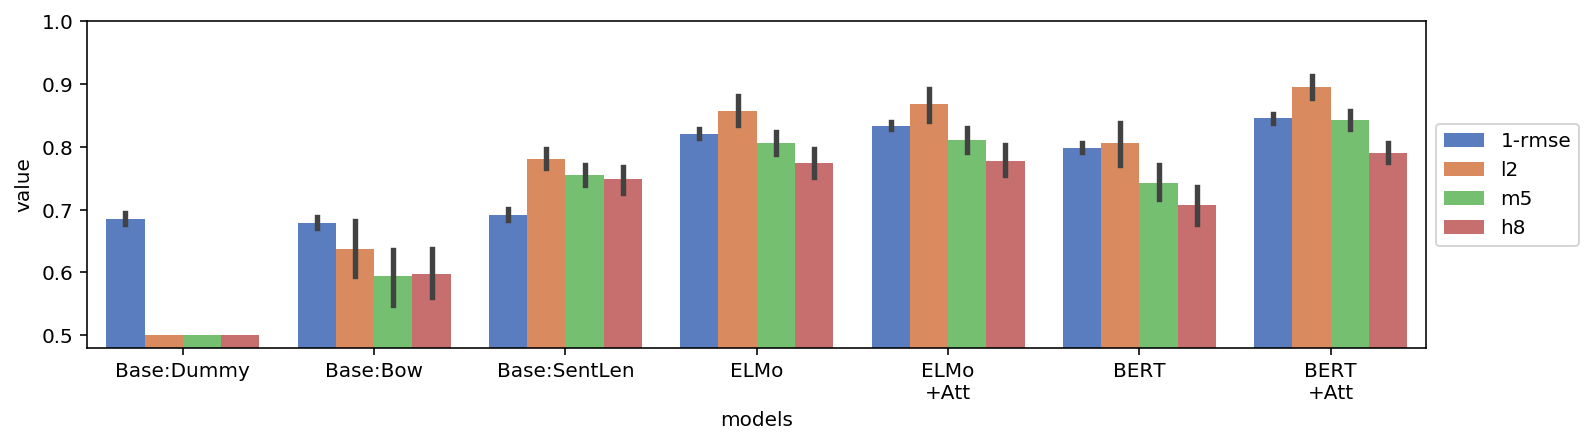

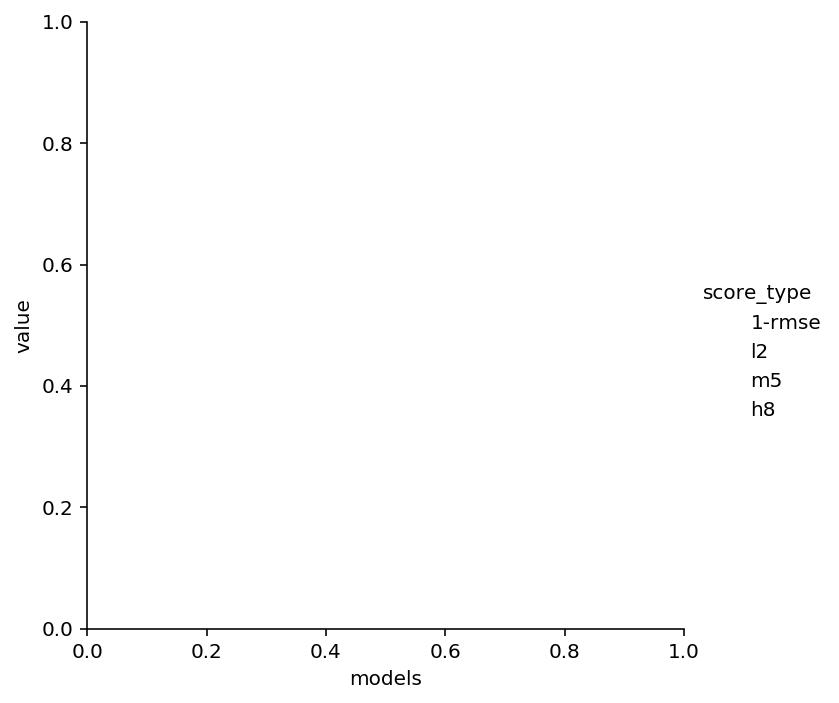

In [87]:
# TODO: baseline split by model type; ELMo&BERT by +ATT

fig, ax = plt.subplots(figsize=(12,3))
sns.catplot(x='models', y='value', hue='score_type',  hue_order=['1-rmse','l2', 'm5', 'h8'],
                  kind="bar", palette="muted",
                  data=tt_bws, ax=ax)
# ax.set_xticklabels(['dummy', 'SentLen', 'BoW',
#            'ELMo', 'ELMo\n+Att',
#            'BERT', 'BERT\n+Att'])
ax.set_ylim(0.48, 1)
ax.set_xticklabels(['Base:Dummy', 'Base:Bow', 'Base:SentLen',
           'ELMo', 'ELMo\n+Att',
           'BERT', 'BERT\n+Att'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

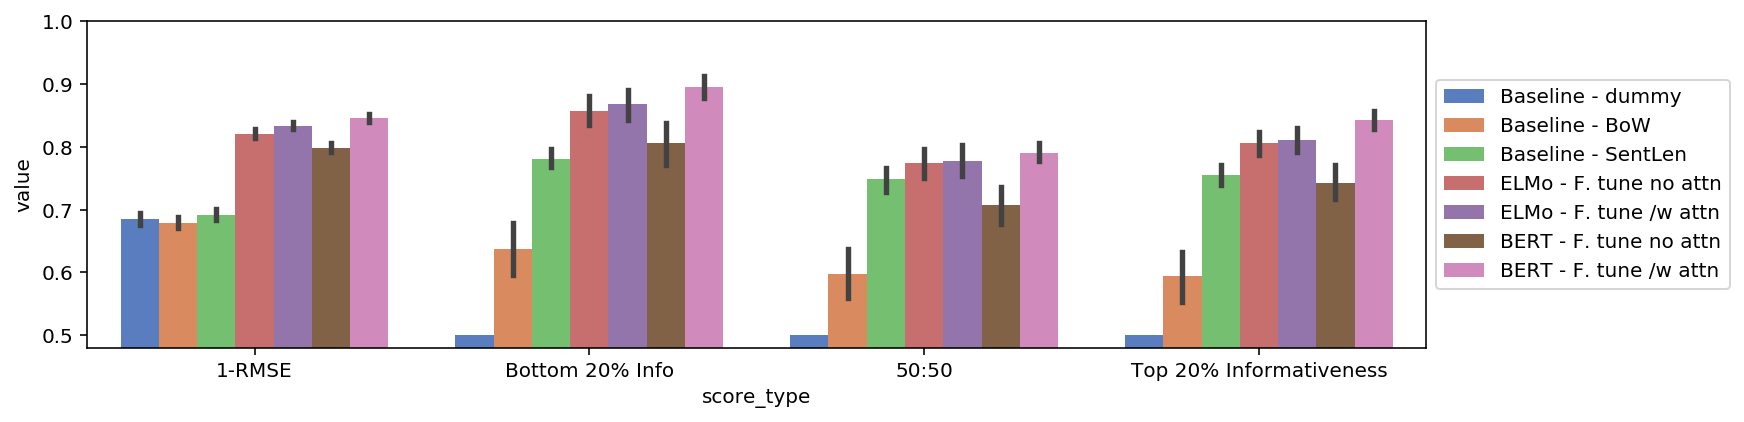

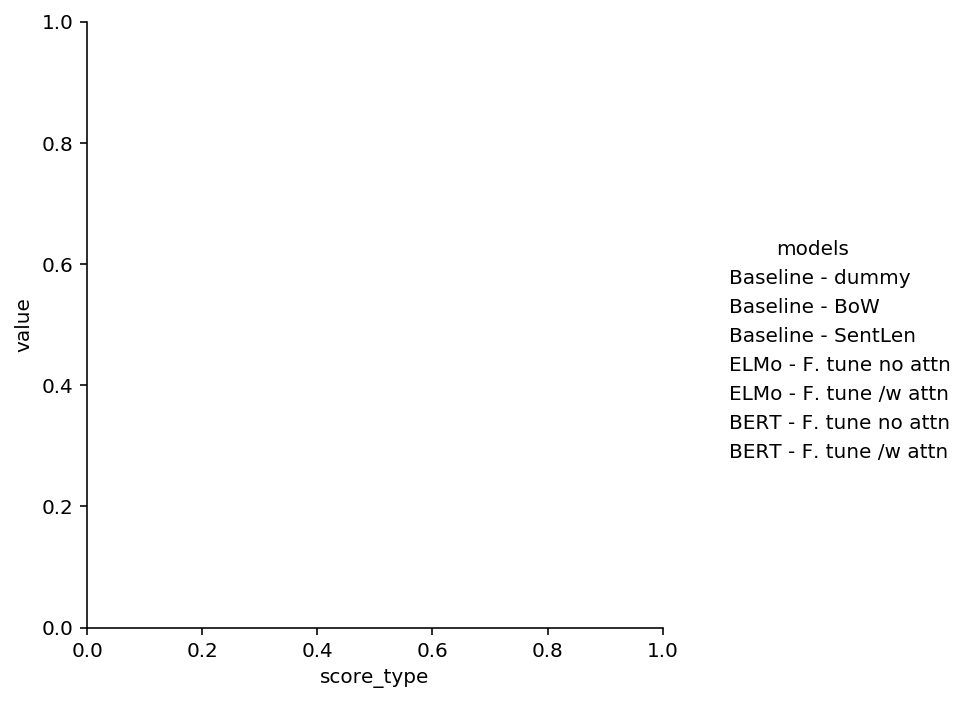

In [88]:
# TODO: baseline split by model type; ELMo&BERT by +ATT

fig, ax = plt.subplots(figsize=(12,3))
sns.catplot(x='score_type', y='value', hue='models',
            kind="bar", palette="muted",
            data=tt_bws, 
            ax=ax, legend_out=True)
# ax.set_xticklabels(['dummy', 'SentLen', 'BoW',
#            'ELMo', 'ELMo\n+Att',
#            'BERT', 'BERT\n+Att'])
ax.set_ylim(0.48, 1)
ax.set_xticklabels(['1-RMSE', 'Bottom 20% Info', '50:50', 'Top 20% Informativeness'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [89]:
tt_l2 = pd.melt(scr_rocauc[['Baseline\n - dummy_l2',  'Baseline\n - BoW_l2', 'Baseline\n - SentLen_l2',
                                     'ELMo - F. tune\n no attn_l2', 'ELMo - F. tune\n /w attn_l2', 
                                     'BERT - F. tune\n no attn_l2', 'BERT - F. tune\n /w attn_l2', ]])
tt_h8 = pd.melt(scr_rocauc[['Baseline\n - dummy_h8', 'Baseline\n - BoW_h8', 'Baseline\n - SentLen_h8',
                                     'ELMo - F. tune\n no attn_h8', 'ELMo - F. tune\n /w attn_h8', 
                                     'BERT - F. tune\n no attn_h8', 'BERT - F. tune\n /w attn_h8', ]])
tt_m5 = pd.melt(scr_rocauc[['Baseline\n - dummy_m5', 'Baseline\n - BoW_m5', 'Baseline\n - SentLen_m5',
                                     'ELMo - F. tune\n no attn_m5', 'ELMo - F. tune\n /w attn_m5', 
                                     'BERT - F. tune\n no attn_m5', 'BERT - F. tune\n /w attn_m5', ]])

tt_bws2 = pd.concat([tt_l2, tt_h8, tt_m5], axis=0)
# tt = tt_l2

In [90]:
tt_bws2['category'] = tt_bws2['variable'].apply(lambda x:x.split('\n')[0])
tt_bws2['models'] = tt_bws2['variable'].apply(lambda x:x.split('\n')[0] + x.split('\n')[-1].split('_')[0])
tt_bws2['score_type'] = tt_bws2['variable'].apply(lambda x:x.split('\n')[-1].split('_')[1])

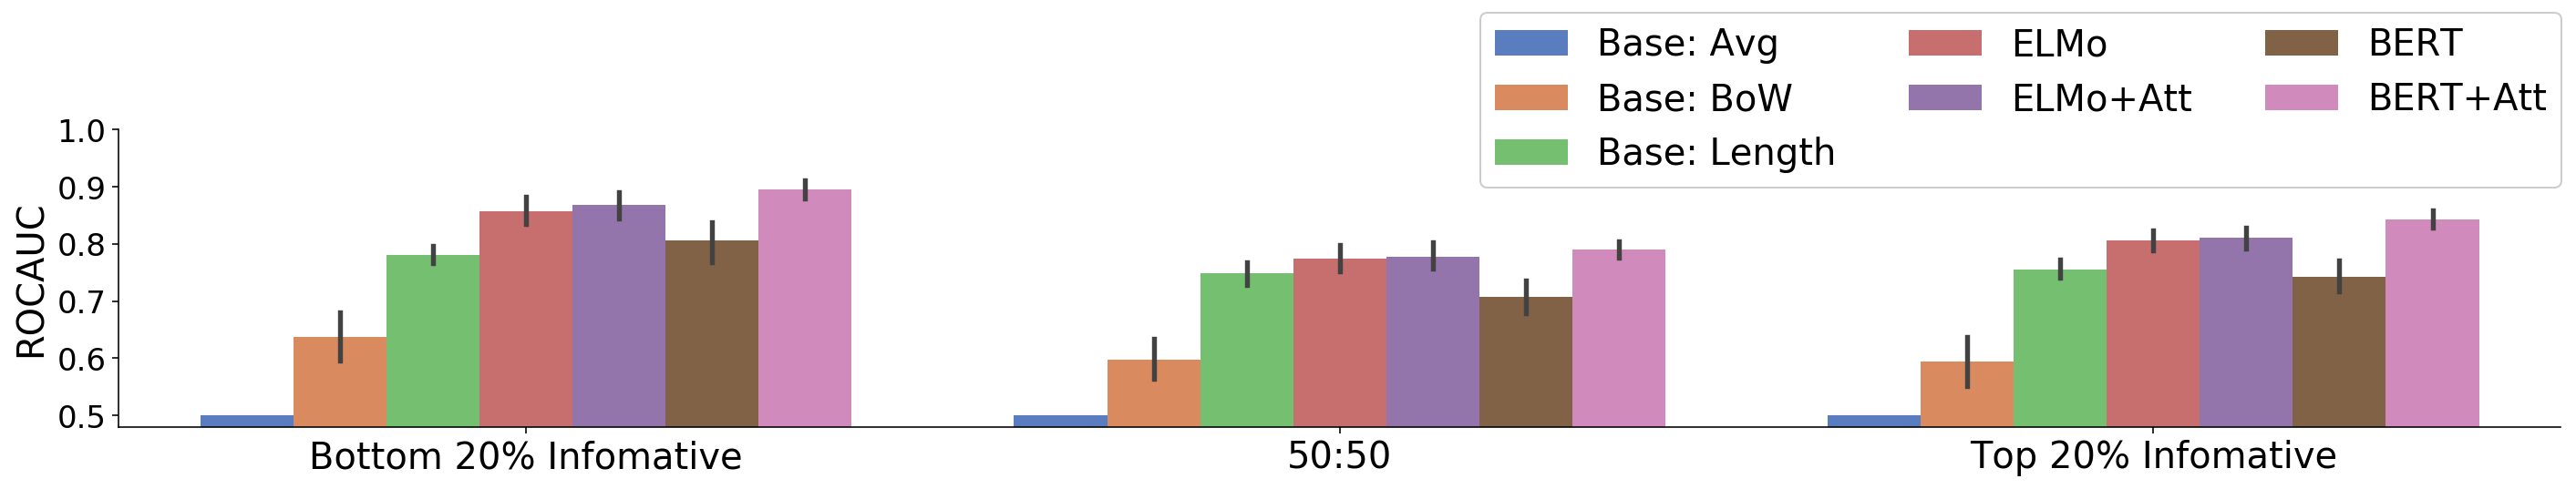

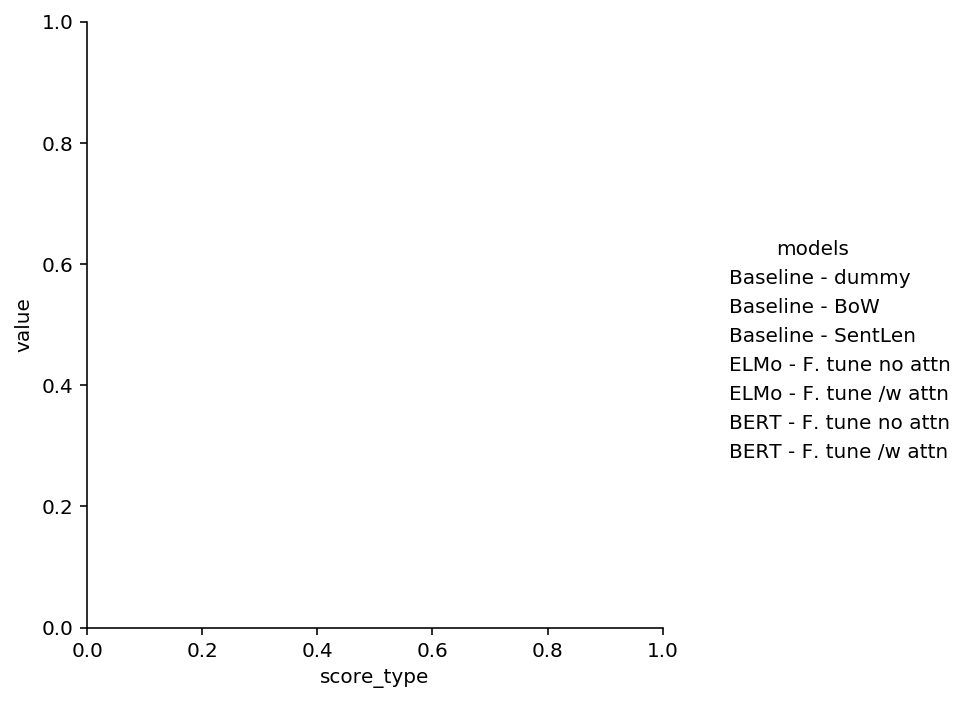

In [94]:
# TODO: baseline split by model type; ELMo&BERT by +ATT
fig, ax = plt.subplots(figsize=(24,3))
sns.catplot(x='score_type', y='value', hue='models',
            kind="bar", palette="muted",
            data=tt_bws2, 
            ax=ax, legend_out=True)
# ax.set_xticklabels(['dummy', 'SentLen', 'BoW',
#            'ELMo', 'ELMo\n+Att',
#            'BERT', 'BERT\n+Att'])
ax.set_ylim(0.48, 1)

# hatches = ['-', '-', '-', '-', '-', '-', '-', '-', '-',
#            '//', '//', '//', '//', '//', '//',
#            '+', '+', '+', '+', '+', '+']
# for i, bar in enumerate(ax.patches):
#     bar.set_hatch(hatches[i])
    
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, loc='center left', bbox_to_anchor=(0.55, 1.1), 
          facecolor='white', framealpha=1.0,
          ncol=3, fontsize=20,
          labels=['Base: Avg', 'Base: BoW', 'Base: Length',
                  'ELMo', 'ELMo+Att',
                  'BERT', 'BERT+Att'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

[ytick.label.set_fontsize(17) for ytick in ax.yaxis.get_major_ticks()]
ax.set_ylabel("ROCAUC", fontsize=20)

ax.set_xlabel("")
ax.set_xticklabels(['Bottom 20% Infomative', '50:50', 'Top 20% Infomative'], fontsize=20)

fig.savefig("result1_2_summary_wider.pdf", dpi=300, bbox_inches = 'tight')

Text(0.5,1,'BWS Score')

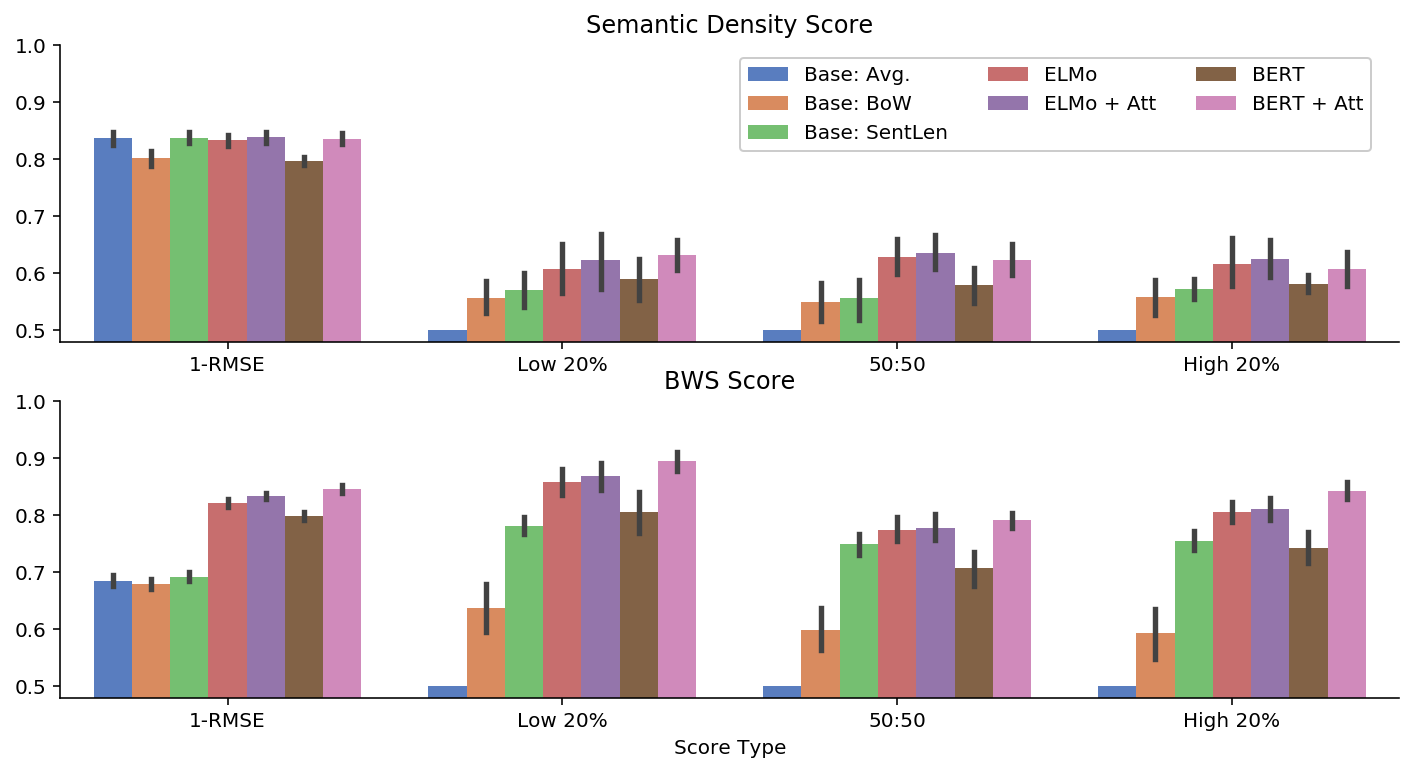

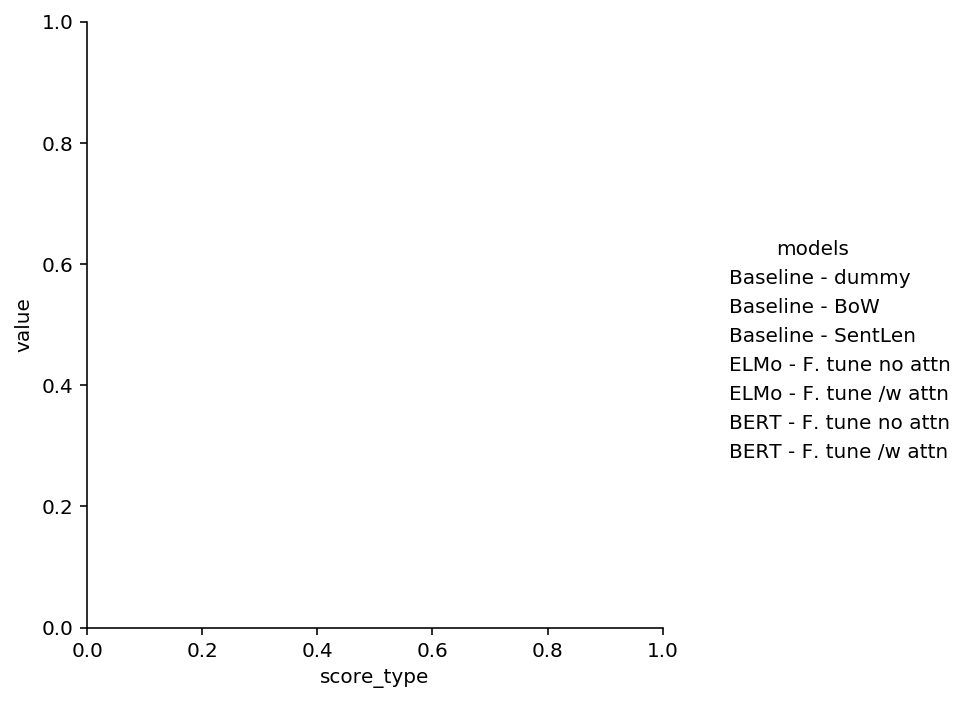

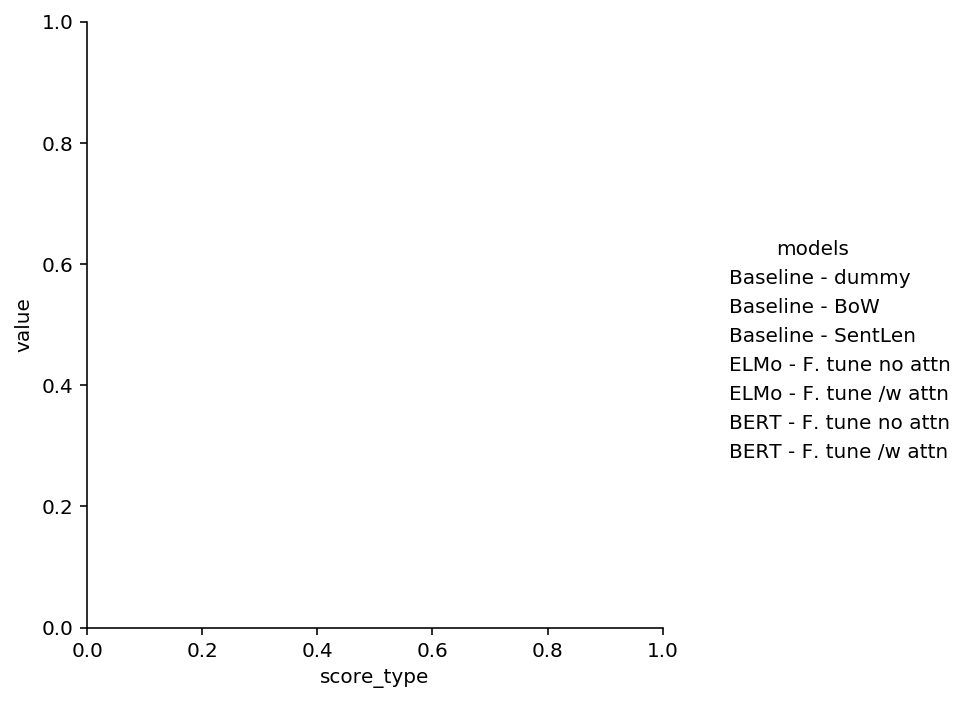

In [313]:
%config InlineBackend.figure_format = 'retina'
# TODO: baseline split by model type; ELMo&BERT by +ATT

fig, ax = plt.subplots(2, 1, figsize=(12,6))
sns.catplot(x='score_type', y='value', hue='models',
            kind="bar", palette="muted",
            data=tt_glv, 
            ax=ax[0])
sns.catplot(x='score_type', y='value', hue='models',
            kind="bar", palette="muted",
            data=tt_bws, 
            ax=ax[1])

for axx in ax:
    axx.set_ylim(0.48, 1)
    axx.set_xticklabels(['1-RMSE', 'Low 20%', '50:50', 'High 20%'])
    handles, _ = axx.get_legend_handles_labels()
    axx.legend(handles=handles, loc='center left', bbox_to_anchor=(0.5, 0.8), 
               facecolor='white', framealpha=1.0,
               ncol=3,  
               labels=['Base: Avg.', 'Base: BoW', 'Base: SentLen',
                       'ELMo', 'ELMo + Att',
                       'BERT', 'BERT + Att'])
    axx.spines['right'].set_visible(False)
    axx.spines['top'].set_visible(False)
    axx.set_ylabel("")
ax[1].legend_.remove() 

ax[0].set_xlabel("")
ax[1].set_xlabel("Score Type")

ax[0].set_title("Semantic Density Score")
ax[1].set_title("BWS Score")

# fig.savefig("result1_2_summary.png", dpi=300)

In [314]:
pd.concat(
    [scr_rmse.filter(regex="Base").apply(lambda col:[round(x, 3)for x in ci(col)], axis=0),
     scr_rmse.filter(regex="F. tune").apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)], axis=0)

Baseline\n - dummy          [0.315, 0.304, 0.326]
Baseline\n - SentLen        [0.308, 0.298, 0.319]
Baseline\n - BoW            [0.321, 0.311, 0.331]
ELMo - F. tune\n no attn     [0.179, 0.17, 0.188]
ELMo - F. tune\n /w attn    [0.166, 0.159, 0.173]
BERT - F. tune\n no attn     [0.201, 0.192, 0.21]
BERT - F. tune\n /w attn    [0.154, 0.146, 0.162]
dtype: object

In [315]:
pd.concat([
    scr_rocauc[['Baseline\n - dummy_l2', 'Baseline\n - BoW_l2', 'Baseline\n - SentLen_l2']]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0),
    scr_rocauc[['ELMo - F. tune\n no attn_l2', 'ELMo - F. tune\n /w attn_l2', 
                'BERT - F. tune\n no attn_l2', 'BERT - F. tune\n /w attn_l2', ]]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)])

Baseline\n - dummy_l2                [0.5, 0.5, 0.5]
Baseline\n - BoW_l2            [0.638, 0.587, 0.689]
Baseline\n - SentLen_l2        [0.781, 0.762, 0.799]
ELMo - F. tune\n no attn_l2    [0.858, 0.828, 0.887]
ELMo - F. tune\n /w attn_l2    [0.868, 0.838, 0.898]
BERT - F. tune\n no attn_l2    [0.806, 0.763, 0.849]
BERT - F. tune\n /w attn_l2    [0.895, 0.875, 0.916]
dtype: object

In [316]:
pd.concat([
    scr_rocauc[['Baseline\n - dummy_m5', 'Baseline\n - BoW_m5', 'Baseline\n - SentLen_m5',]]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0),
    scr_rocauc[['ELMo - F. tune\n no attn_m5', 'ELMo - F. tune\n /w attn_m5', 
                'BERT - F. tune\n no attn_m5', 'BERT - F. tune\n /w attn_m5', ]]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)])

Baseline\n - dummy_m5                [0.5, 0.5, 0.5]
Baseline\n - BoW_m5            [0.594, 0.542, 0.646]
Baseline\n - SentLen_m5        [0.755, 0.736, 0.775]
ELMo - F. tune\n no attn_m5    [0.806, 0.784, 0.827]
ELMo - F. tune\n /w attn_m5     [0.81, 0.787, 0.834]
BERT - F. tune\n no attn_m5     [0.743, 0.71, 0.775]
BERT - F. tune\n /w attn_m5     [0.842, 0.824, 0.86]
dtype: object

In [317]:
pd.concat([
    scr_rocauc[['Baseline\n - dummy_h8', 'Baseline\n - BoW_h8', 'Baseline\n - SentLen_h8',]]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0),
    scr_rocauc[['ELMo - F. tune\n no attn_h8', 'ELMo - F. tune\n /w attn_h8', 
                'BERT - F. tune\n no attn_h8', 'BERT - F. tune\n /w attn_h8', ]]\
    .apply(lambda col:[round(x, 3)for x in ci(col)], axis=0)])

Baseline\n - dummy_h8                [0.5, 0.5, 0.5]
Baseline\n - BoW_h8            [0.598, 0.552, 0.643]
Baseline\n - SentLen_h8        [0.749, 0.725, 0.773]
ELMo - F. tune\n no attn_h8    [0.775, 0.748, 0.802]
ELMo - F. tune\n /w attn_h8    [0.778, 0.749, 0.807]
BERT - F. tune\n no attn_h8    [0.707, 0.672, 0.743]
BERT - F. tune\n /w attn_h8    [0.791, 0.773, 0.809]
dtype: object